# Import Lirary

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [6]:
data=pd.read_csv("election_results_2024.csv")

In [7]:
data.sample()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
502,TIRUPPUR,18,"SUBBARAYAN, K.",Communist Party of India,"ARUNACHALAM, P.",All India Anna Dravida Munnetra Kazhagam,125928,Result Declared


In [8]:
data.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


# Party with highest and lowest margin of victory

In [34]:
# Convert the "Margin" column to numeric (if not already done)
data["Margin"] = pd.to_numeric(data["Margin"], errors="coerce")

# Party with the highest and lowest margin of victory
highest_margin = data.loc[data["Margin"].idxmax()]
lowest_margin = data.loc[data["Margin"].idxmin()]

# Print the results
print("Party with the highest margin of victory:")
print(highest_margin)

print("\nParty with the lowest margin of victory:")
print(lowest_margin)

Party with the highest margin of victory:
Constituency                               INDORE
Const. No.                                     26
Leading Candidate                 SHANKAR LALWANI
Leading Party              Bharatiya Janata Party
Trailing Candidate    SANJAY S/O LAKSHMAN SOLANKI
Trailing Party                Bahujan Samaj Party
Margin                                  1175092.0
Status                            Result Declared
Name: 221, dtype: object

Party with the lowest margin of victory:
Constituency                              Mumbai North West
Const. No.                                               27
Leading Candidate                  RAVINDRA DATTARAM WAIKAR
Leading Party                                     Shiv Sena
Trailing Candidate                    AMOL GAJANAN KIRTIKAR
Trailing Party        Shiv Sena (Uddhav Balasaheb Thackrey)
Margin                                                 48.0
Status                                      Result Declared
Name: 357, 

# Plot number of seats won by each party

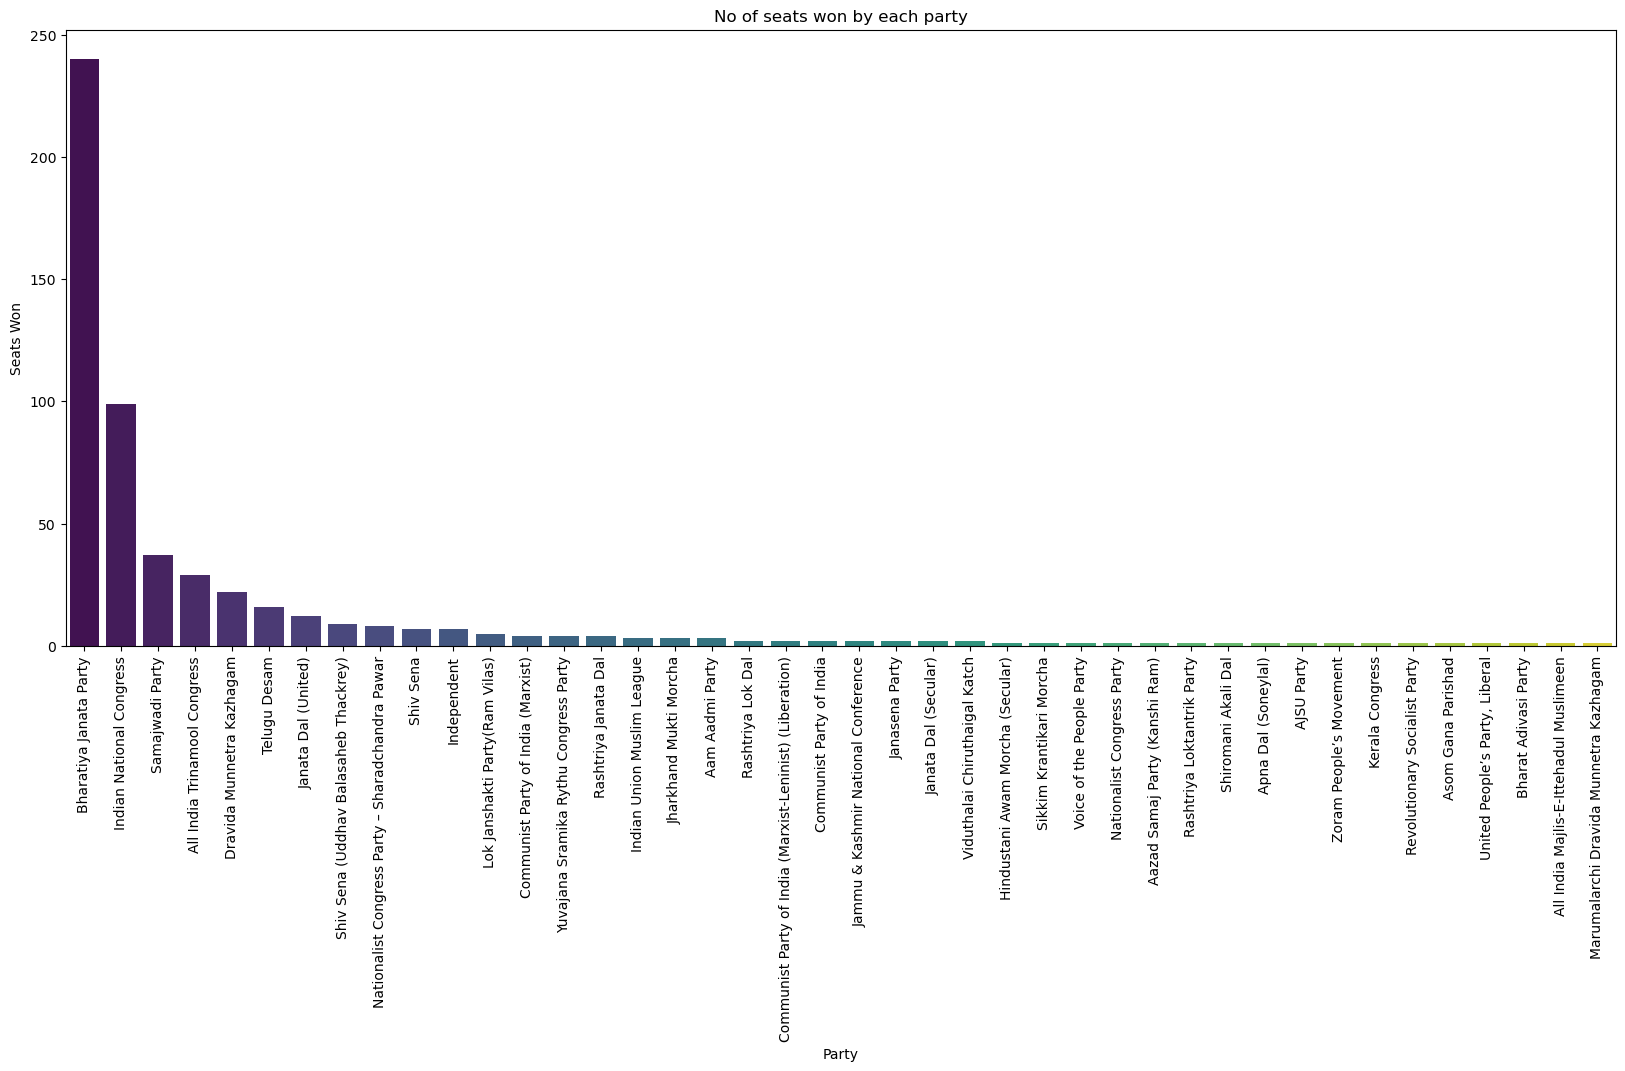

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the election data

# Calculate the sum of margins for each leading party
party_votes = data.groupby("Leading Party")["Margin"].sum()

# Party with highest and lowest margin of victory
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()

# No of seats won by each party
seats_won = data["Leading Party"].value_counts()

# Plot no of seats won by each party
plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, hue=seats_won.index, palette="viridis", legend=False)
plt.title("No of seats won by each party")
plt.xlabel("Party")
plt.ylabel("Seats Won")
plt.xticks(rotation=90)
plt.show()

# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah

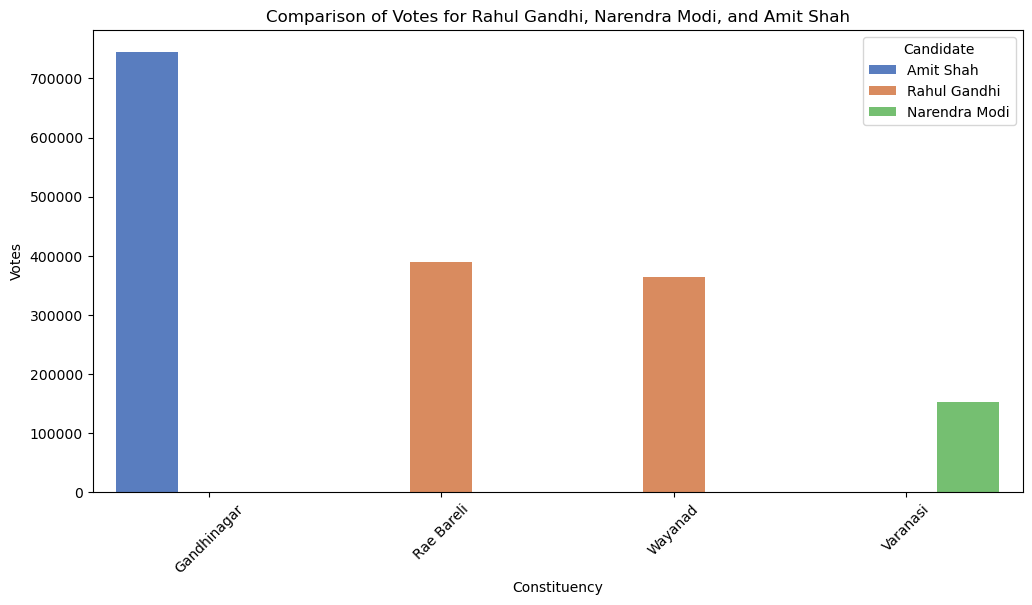

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the election data

# Filter entries for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_entries = data[data["Leading Candidate"] == "RAHUL GANDHI"]
modi_entries = data[data["Leading Candidate"] == "NARENDRA MODI"]
amit_entries = data[data["Leading Candidate"] == "AMIT SHAH"]

# Extract votes and constituencies
rahul_votes = rahul_entries["Margin"].tolist()
modi_votes = modi_entries["Margin"].tolist()
amit_votes = amit_entries["Margin"].tolist()

rahul_constituencies = rahul_entries["Constituency"].tolist()
modi_constituencies = modi_entries["Constituency"].tolist()
amit_constituencies = amit_entries["Constituency"].tolist()

# Combine the data properly
data_to_plot = pd.DataFrame({
    "Candidate": (["Rahul Gandhi"] * len(rahul_votes)) + 
                 (["Narendra Modi"] * len(modi_votes)) + 
                 (["Amit Shah"] * len(amit_votes)),
    
    "Constituency": rahul_constituencies + modi_constituencies + amit_constituencies,
    "Votes": rahul_votes + modi_votes + amit_votes
})

# Ensure sorting is correct
data_to_plot = data_to_plot.sort_values(by=["Votes"], ascending=False)  # Sort by vote margin

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(
    data=data_to_plot,
    x="Constituency",  
    y="Votes",         
    hue="Candidate",  
    palette="muted",  
    dodge=True  # Ensure bars are separated per candidate
)
plt.title("Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah")
plt.xlabel("Constituency")
plt.ylabel("Votes")
plt.xticks(rotation=45)
plt.legend(title="Candidate")  # Add a legend for clarity
plt.show()

# Candidates with Highest and Lowest Margin Victory

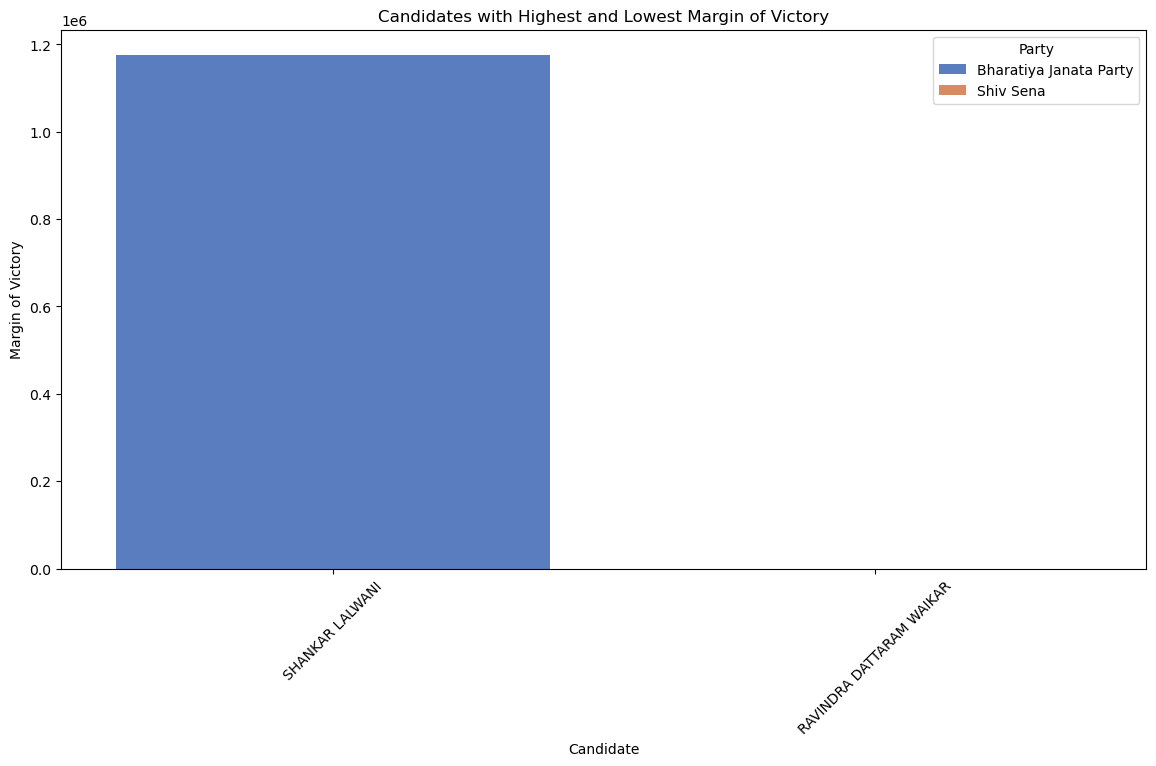

In [45]:
# Ensure the "Margin" column is numeric
data["Margin"] = pd.to_numeric(data["Margin"], errors="coerce")

# Find entries with the highest and lowest margin of victory
highest_margin_entry = data.loc[data["Margin"].idxmax()]
lowest_margin_entry = data.loc[data["Margin"].idxmin()]

# Combining the data
data_to_plot = pd.DataFrame({
    "Candidate": [highest_margin_entry["Leading Candidate"], lowest_margin_entry["Leading Candidate"]],
    "Party": [highest_margin_entry["Leading Party"], lowest_margin_entry["Leading Party"]],
    "Margin": [highest_margin_entry["Margin"], lowest_margin_entry["Margin"]]
})

# Plot the comparison
plt.figure(figsize=(14, 7))
sns.barplot(
    x="Candidate",  # Positional argument for x-axis
    y="Margin",     # Positional argument for y-axis
    hue="Party",    # Keyword argument for hue
    data=data_to_plot,  # Keyword argument for data
    palette="muted"  # Keyword argument for palette
)
plt.title("Candidates with Highest and Lowest Margin of Victory")
plt.xlabel("Candidate")
plt.ylabel("Margin of Victory")
plt.xticks(rotation=45)
plt.show()

# Histogram of Margin of Voctory

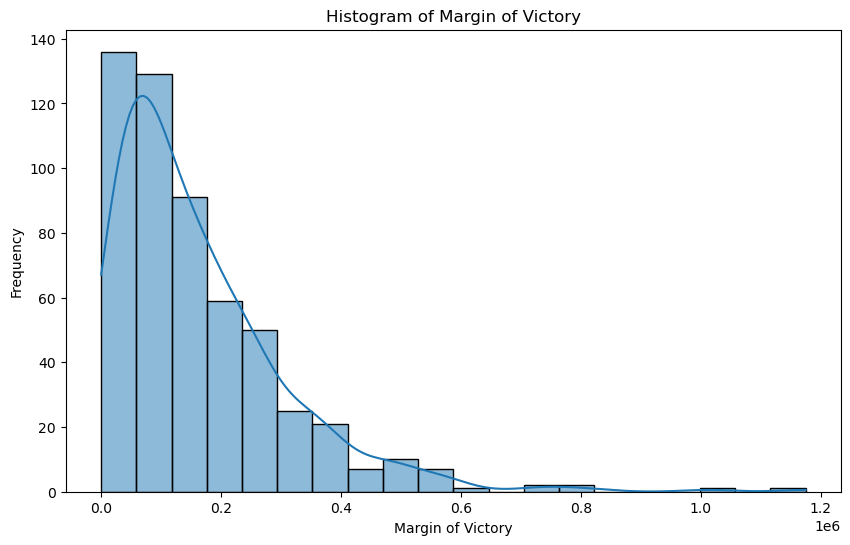

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(data["Margin"], bins=20, kde=True)
plt.title("Histogram of Margin of Victory")
plt.xlabel("Margin of Victory")
plt.ylabel("Frequency")
plt.show()

# Votes Distribution by Party

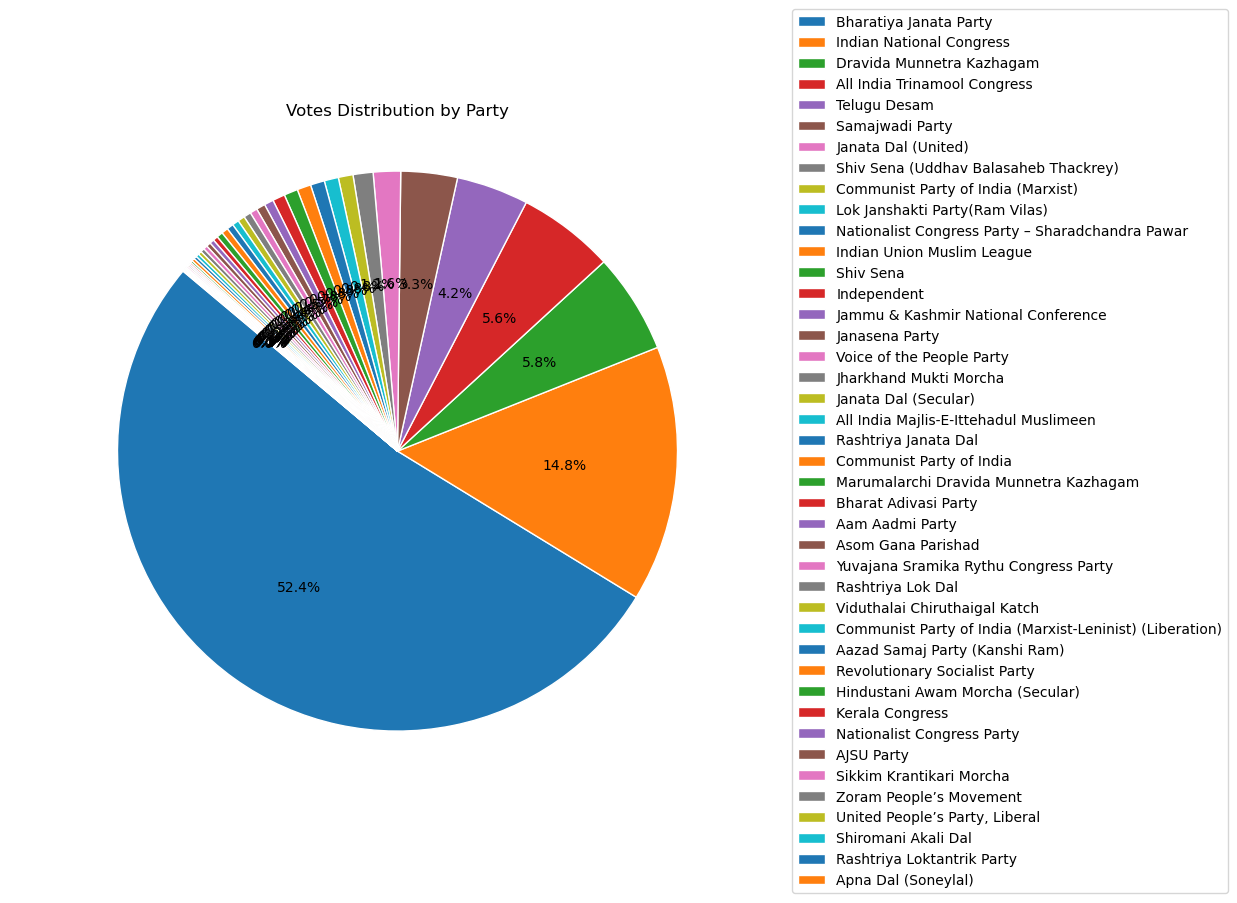

In [48]:
party_votes = data.groupby("Leading Party")["Margin"].sum().sort_values(ascending=False)

# Plotting Pie Chart
plt.figure(figsize=(10,8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct = "%1.1f%%", startangle=140, wedgeprops=dict(edgecolor="w"))
plt.title("Votes Distribution by Party", pad=20)
plt.axis("equal")
plt.legend(labels=party_votes.index, loc="center left", bbox_to_anchor=(1,0.5), fontsize="medium")
plt.show()

# Top 10 Trailing Party by Vote

In [49]:
trailing_party_votes = data.groupby("Trailing Party")["Margin"].sum().sort_values(ascending=False)
trailing_party_seats = data["Trailing Party"].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

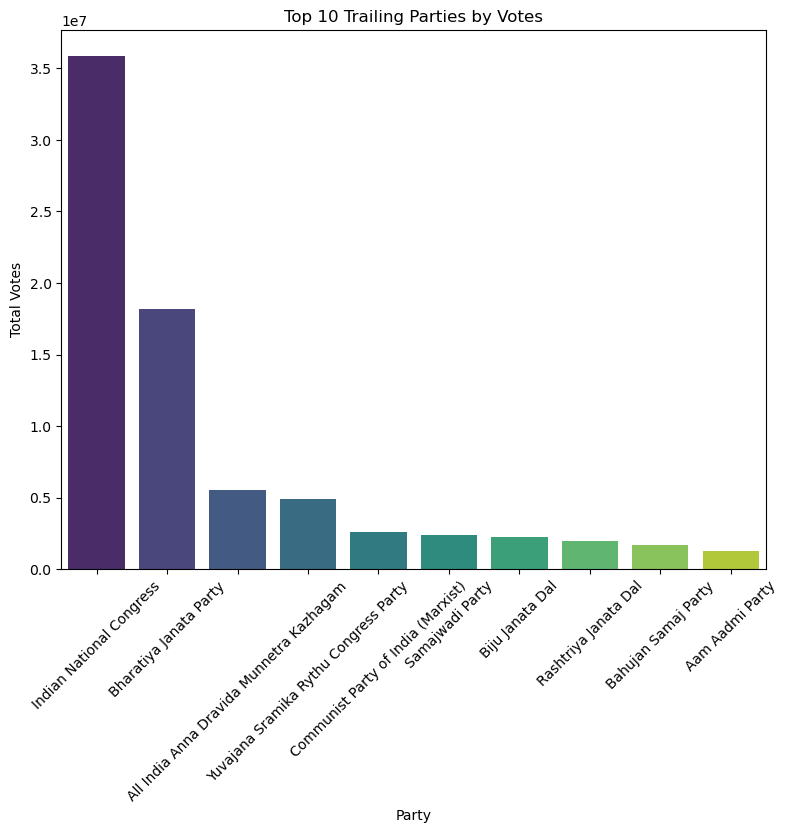

In [59]:
plt.figure(figsize=(20,7))
# Plot votes distribution by Trailing Party
plt.subplot(1, 2, 1)
sns.barplot(
    x=trailing_party_votes.index[:10],  # x-axis data
    y=trailing_party_votes.values[:10],  # y-axis data
    hue=trailing_party_votes.index[:10],  # Assign x to hue
    palette="viridis",  # Use viridis color palette
    legend=False  # Disable legend
)
plt.title("Top 10 Trailing Parties by Votes")
plt.xlabel("Party")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)

# Top 10 Trailing Party by SEAT

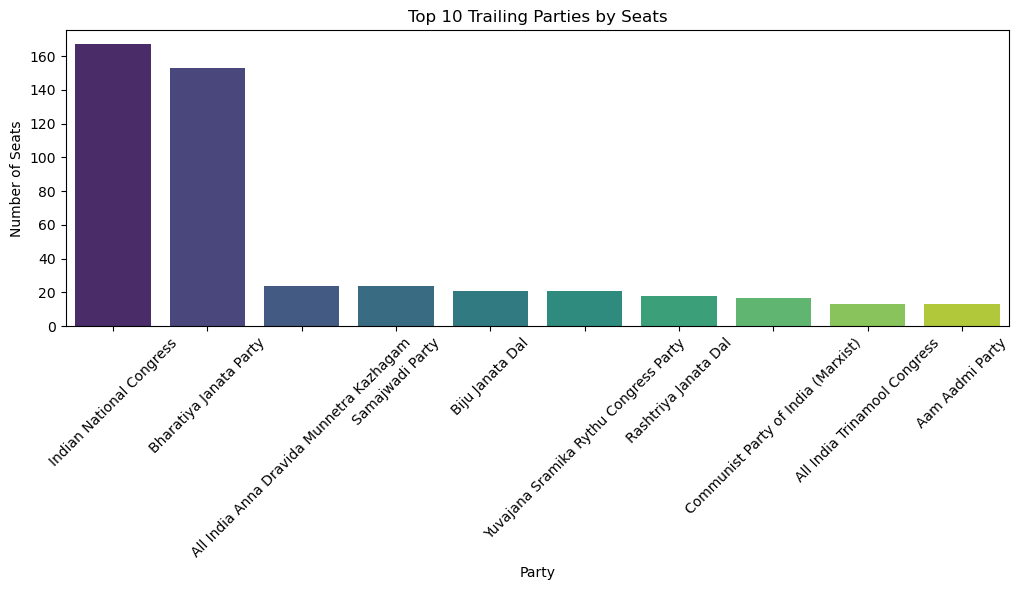

In [63]:
plt.figure(figsize=(20,6))
# Plot Seats distribution by Trailing Party
plt.subplot(1, 2, 2)
sns.barplot(
    x=trailing_party_seats.index[:10],  # x-axis data
    y=trailing_party_seats.values[:10],  # y-axis data
    hue=trailing_party_seats.index[:10],  # Assign x to hue
    palette="viridis",  # Use viridis color palette
    legend=False  # Disable legend
)
plt.title("Top 10 Trailing Parties by Seats")
plt.xlabel("Party")
plt.ylabel("Number of Seats")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()